In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

df = pd.read_csv('/kaggle/input/hse-dab-naf-23/PRODUCT.csv', delimiter=';')

# product

In [4]:
df.columns

Index(['PRODUCT_RK', 'PRODUCT_LVL_RK6', 'PRODUCT_LVL_RK5', 'PRODUCT_LVL_RK4',
       'PRODUCT_LVL_RK3', 'PRODUCT_LVL_RK2', 'PRODUCT_LVL_RK1',
       'SALES_INTRODUCTION_DT', 'SALES_DISCONTINUED_DT', 'VALID_FROM_DTTM',
       'VALID_TO_DTTM', 'PROCESSED_DTTM', 'PRODUCT_ADK_hashing',
       'PRODUCT_ID_hashing', 'PRODUCT_NM_hashing', 'PRODUCT_DESC_hashing',
       'LANGUAGE_CD_hashing', 'PRODUCT_LVL_ID6_hashing',
       'PRODUCT_LVL_NM6_hashing', 'PRODUCT_LVL_DESC6_hashing',
       'PRODUCT_LVL_ID5_hashing', 'PRODUCT_LVL_NM5_hashing',
       'PRODUCT_LVL_DESC5_hashing', 'PRODUCT_LVL_ID4_hashing',
       'PRODUCT_LVL_NM4_hashing', 'PRODUCT_LVL_DESC4_hashing',
       'PRODUCT_LVL_ID3_hashing', 'PRODUCT_LVL_NM3_hashing',
       'PRODUCT_LVL_DESC3_hashing', 'PRODUCT_LVL_ID2_hashing',
       'PRODUCT_LVL_NM2_hashing', 'PRODUCT_LVL_DESC2_hashing',
       'PRODUCT_LVL_ID1_hashing', 'PRODUCT_LVL_NM1_hashing',
       'PRODUCT_LVL_DESC1_hashing', 'PRODUCT_ATTRIB1_hashing',
       'PRODUCT_ATTRIB2_

In [5]:
df = df[df.PRODUCT_LVL_RK5 == 3865]

In [6]:
chek = [column for column in df if column.endswith('hashing')]

In [7]:
# set(df['PRODUCT_LVL_RK6'].values)

In [8]:
df

,PRODUCT_RK,PRODUCT_LVL_RK6,PRODUCT_LVL_RK5,PRODUCT_LVL_RK4,PRODUCT_LVL_RK3,PRODUCT_LVL_RK2,PRODUCT_LVL_RK1,SALES_INTRODUCTION_DT,SALES_DISCONTINUED_DT,VALID_FROM_DTTM,...,PRODUCT_ATTRIB23_hashing,PRODUCT_ATTRIB24_hashing,PRODUCT_ATTRIB25_hashing,PRODUCT_ATTRIB26_hashing,PRODUCT_ATTRIB27_hashing,PRODUCT_ATTRIB28_hashing,PRODUCT_ATTRIB29_hashing,PRODUCT_ATTRIB30_hashing,PRODUCT_ATTRIB31_hashing,PRODUCT_TYPE_CD_hashing
4781,16097,3876,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,...,E0A3AAA77B50DDD3A67C3118EA559F6A,CE6E6B615231B052EF75AEDBED6491A5,E054D49EAC1E947B5CB0EE77952C5F9E,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
4782,16098,3876,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,...,E0A3AAA77B50DDD3A67C3118EA559F6A,CE6E6B615231B052EF75AEDBED6491A5,E054D49EAC1E947B5CB0EE77952C5F9E,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
4783,16099,3876,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,...,E0A3AAA77B50DDD3A67C3118EA559F6A,CE6E6B615231B052EF75AEDBED6491A5,E054D49EAC1E947B5CB0EE77952C5F9E,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
4784,16100,3876,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,...,E0A3AAA77B50DDD3A67C3118EA559F6A,CE6E6B615231B052EF75AEDBED6491A5,E054D49EAC1E947B5CB0EE77952C5F9E,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
4785,16101,3876,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,...,E0A3AAA77B50DDD3A67C3118EA559F6A,CE6E6B615231B052EF75AEDBED6491A5,E054D49EAC1E947B5CB0EE77952C5F9E,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170954,190303,3897,3865,72946,3752,9848,1,NaN,NaN,20Dec2019:08:01:18,...,8B11589E938E9D05F4592FFC7253FF2F,CE6E6B615231B052EF75AEDBED6491A5,9EC0E858658F82509CDE308BFA404F47,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
170955,190304,3897,3865,72946,3752,9848,1,NaN,NaN,20Dec2019:08:01:18,...,8B11589E938E9D05F4592FFC7253FF2F,CE6E6B615231B052EF75AEDBED6491A5,9EC0E858658F82509CDE308BFA404F47,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
171218,190621,3904,3865,72946,3752,9848,1,NaN,NaN,28Dec2019:10:42:00,...,8B11589E938E9D05F4592FFC7253FF2F,CE6E6B615231B052EF75AEDBED6491A5,CE6E6B615231B052EF75AEDBED6491A5,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
171401,190826,3908,3865,72946,3752,9848,1,NaN,NaN,03Jan2020:07:01:13,...,357E85CD835266C212E84DEC782CC05B,CE6E6B615231B052EF75AEDBED6491A5,57A8D677942BEC55FFB6C2F3ED8A8D3D,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786D

In [9]:
location = pd.read_csv('/kaggle/input/hse-dab-naf-23/LOCATION.csv', delimiter=';')
product = pd.read_csv('/kaggle/input/hse-dab-naf-23/PRODUCT.csv', delimiter=';')
data = pd.read_csv('/kaggle/input/hse-dab-naf-23/train.csv')
test = pd.read_csv('/kaggle/input/hse-dab-naf-23/test.csv')

In [10]:
test

,product_id,location_id,period_dt,id
0,22939,1162,2019-12-30,16
1,23162,1162,2019-12-30,7867
2,23163,1162,2019-12-16,8667
3,23632,798,2019-12-23,14835
4,23633,1347,2019-12-30,14959
...,...,...,...,...
588,139157,1326,2019-12-16,203996
589,139157,1347,2019-12-09,203997
590,148040,425,2019-12-09,204035
591,148040,525,2019-12-09,204037


In [11]:
df = df.rename(columns = {'PRODUCT_RK' : 'product_id'})
df

,product_id,PRODUCT_LVL_RK6,PRODUCT_LVL_RK5,PRODUCT_LVL_RK4,PRODUCT_LVL_RK3,PRODUCT_LVL_RK2,PRODUCT_LVL_RK1,SALES_INTRODUCTION_DT,SALES_DISCONTINUED_DT,VALID_FROM_DTTM,...,PRODUCT_ATTRIB23_hashing,PRODUCT_ATTRIB24_hashing,PRODUCT_ATTRIB25_hashing,PRODUCT_ATTRIB26_hashing,PRODUCT_ATTRIB27_hashing,PRODUCT_ATTRIB28_hashing,PRODUCT_ATTRIB29_hashing,PRODUCT_ATTRIB30_hashing,PRODUCT_ATTRIB31_hashing,PRODUCT_TYPE_CD_hashing
4781,16097,3876,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,...,E0A3AAA77B50DDD3A67C3118EA559F6A,CE6E6B615231B052EF75AEDBED6491A5,E054D49EAC1E947B5CB0EE77952C5F9E,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
4782,16098,3876,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,...,E0A3AAA77B50DDD3A67C3118EA559F6A,CE6E6B615231B052EF75AEDBED6491A5,E054D49EAC1E947B5CB0EE77952C5F9E,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
4783,16099,3876,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,...,E0A3AAA77B50DDD3A67C3118EA559F6A,CE6E6B615231B052EF75AEDBED6491A5,E054D49EAC1E947B5CB0EE77952C5F9E,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
4784,16100,3876,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,...,E0A3AAA77B50DDD3A67C3118EA559F6A,CE6E6B615231B052EF75AEDBED6491A5,E054D49EAC1E947B5CB0EE77952C5F9E,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
4785,16101,3876,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,...,E0A3AAA77B50DDD3A67C3118EA559F6A,CE6E6B615231B052EF75AEDBED6491A5,E054D49EAC1E947B5CB0EE77952C5F9E,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170954,190303,3897,3865,72946,3752,9848,1,NaN,NaN,20Dec2019:08:01:18,...,8B11589E938E9D05F4592FFC7253FF2F,CE6E6B615231B052EF75AEDBED6491A5,9EC0E858658F82509CDE308BFA404F47,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
170955,190304,3897,3865,72946,3752,9848,1,NaN,NaN,20Dec2019:08:01:18,...,8B11589E938E9D05F4592FFC7253FF2F,CE6E6B615231B052EF75AEDBED6491A5,9EC0E858658F82509CDE308BFA404F47,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
171218,190621,3904,3865,72946,3752,9848,1,NaN,NaN,28Dec2019:10:42:00,...,8B11589E938E9D05F4592FFC7253FF2F,CE6E6B615231B052EF75AEDBED6491A5,CE6E6B615231B052EF75AEDBED6491A5,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
171401,190826,3908,3865,72946,3752,9848,1,NaN,NaN,03Jan2020:07:01:13,...,357E85CD835266C212E84DEC782CC05B,CE6E6B615231B052EF75AEDBED6491A5,57A8D677942BEC55FFB6C2F3ED8A8D3D,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786D

In [12]:
test = test.merge(df, how='left')

In [13]:
set(test['PRODUCT_LVL_RK6'].values)

{3874,
 3876,
 3881,
 3885,
 3893,
 3897,
 3908,
 3926,
 4288,
 4290,
 9912,
 9917,
 9923,
 9928,
 9930}

In [14]:
df = pd.read_csv('/kaggle/input/hse-dab-naf-23/PRODUCT.csv', delimiter=';')
df = df[df.PRODUCT_LVL_RK5 == 3865].rename(columns = {'PRODUCT_RK' : 'product_id'})
len(set(df['product_id'].values))

11319

In [15]:
test = pd.read_csv('/kaggle/input/hse-dab-naf-23/test.csv')
test = test.merge(df, how='left')
len(set(test['product_id'].values))

277

In [16]:
data = pd.read_csv('/kaggle/input/hse-dab-naf-23/train.csv')
data = data.merge(df, how='left')
data = data[data.PRODUCT_LVL_RK5 == 3865]
len(set(data['product_id'].fillna(0).values))

2140

In [17]:
a = list(set(data['product_id'].fillna(0).astype(int).values))

In [18]:
df = df[df['product_id'].isin(a)].reset_index(drop=True)
df

,product_id,PRODUCT_LVL_RK6,PRODUCT_LVL_RK5,PRODUCT_LVL_RK4,PRODUCT_LVL_RK3,PRODUCT_LVL_RK2,PRODUCT_LVL_RK1,SALES_INTRODUCTION_DT,SALES_DISCONTINUED_DT,VALID_FROM_DTTM,...,PRODUCT_ATTRIB23_hashing,PRODUCT_ATTRIB24_hashing,PRODUCT_ATTRIB25_hashing,PRODUCT_ATTRIB26_hashing,PRODUCT_ATTRIB27_hashing,PRODUCT_ATTRIB28_hashing,PRODUCT_ATTRIB29_hashing,PRODUCT_ATTRIB30_hashing,PRODUCT_ATTRIB31_hashing,PRODUCT_TYPE_CD_hashing
0,22939,3876,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,...,082C6C1C596475C2DBA0649E9C3EF4CC,CE6E6B615231B052EF75AEDBED6491A5,E054D49EAC1E947B5CB0EE77952C5F9E,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
1,22940,3876,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,...,082C6C1C596475C2DBA0649E9C3EF4CC,CE6E6B615231B052EF75AEDBED6491A5,E054D49EAC1E947B5CB0EE77952C5F9E,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
2,22941,3876,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,...,082C6C1C596475C2DBA0649E9C3EF4CC,CE6E6B615231B052EF75AEDBED6491A5,E054D49EAC1E947B5CB0EE77952C5F9E,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
3,22942,3876,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,...,082C6C1C596475C2DBA0649E9C3EF4CC,CE6E6B615231B052EF75AEDBED6491A5,E054D49EAC1E947B5CB0EE77952C5F9E,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
4,22947,3876,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,...,082C6C1C596475C2DBA0649E9C3EF4CC,CE6E6B615231B052EF75AEDBED6491A5,28894FD6B552C50A30C6D7F3EA52FF08,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,149484,3908,3865,72946,3752,9848,1,NaN,NaN,09Aug2019:00:42:24,...,B9BF0810E54357FA3945C9399F4A8CA8,CE6E6B615231B052EF75AEDBED6491A5,83887CB0BDB4C2ECB8F3F74221C71DAB,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
2136,149509,6161,3865,72946,3752,9848,1,NaN,NaN,09Aug2019:00:42:24,...,B9BF0810E54357FA3945C9399F4A8CA8,CE6E6B615231B052EF75AEDBED6491A5,E054D49EAC1E947B5CB0EE77952C5F9E,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
2137,149518,3908,3865,72946,3752,9848,1,NaN,NaN,09Aug2019:00:42:24,...,B9BF0810E54357FA3945C9399F4A8CA8,CE6E6B615231B052EF75AEDBED6491A5,F85B2B2CD43A8DE37360F1D3C60085C6,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
2138,149520,3908,3865,72946,3752,9848,1,NaN,NaN,09Aug2019:00:42:24,...,B9BF0810E54357FA3945C9399F4A8CA8,CE6E6B615231B052EF75AEDBED6491A5,F85B2B2CD43A8DE37360F1D3C60085C6,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,F

In [19]:
ids = dict()
for val in a:
    if len(df.index[df['product_id'] == val].tolist()) != 1:
        print(df.index[df['product_id'] == val].tolist())
    ids[int(val)] = df.index[df['product_id'] == val].tolist()[0]

In [20]:
# ids

In [21]:
d = ids[40989]
df.iloc[d]

product_id                                             40989
PRODUCT_LVL_RK6                                         3926
PRODUCT_LVL_RK5                                         3865
PRODUCT_LVL_RK4                                        72946
PRODUCT_LVL_RK3                                         3752
                                          ...               
PRODUCT_ATTRIB28_hashing    FF83472786DB3B25D48ABD61502E1D91
PRODUCT_ATTRIB29_hashing    FF83472786DB3B25D48ABD61502E1D91
PRODUCT_ATTRIB30_hashing    FF83472786DB3B25D48ABD61502E1D91
PRODUCT_ATTRIB31_hashing    FF83472786DB3B25D48ABD61502E1D91
PRODUCT_TYPE_CD_hashing     41B394758330C83757856AA482C79977
Name: 437, Length: 67, dtype: object

In [22]:
vec_col = ['product_id']
vec_col.extend(a)

In [23]:
len(set(vec_col))

2141

In [24]:
mtr = pd.DataFrame(columns = vec_col)

In [25]:
mtr

,product_id,40989,81951,32809,32810,32813,32814,32815,32818,32819,...,73700,73701,73702,73703,32747,98284,32748,32749,32755,56986


In [26]:
chek = ['PRODUCT_LVL_RK6'] + [column for column in df if column.endswith('hashing')]

In [27]:
df2 = df.copy()
for col in chek:
    df2[col] = df2[col].astype(str)
df2

,product_id,PRODUCT_LVL_RK6,PRODUCT_LVL_RK5,PRODUCT_LVL_RK4,PRODUCT_LVL_RK3,PRODUCT_LVL_RK2,PRODUCT_LVL_RK1,SALES_INTRODUCTION_DT,SALES_DISCONTINUED_DT,VALID_FROM_DTTM,...,PRODUCT_ATTRIB23_hashing,PRODUCT_ATTRIB24_hashing,PRODUCT_ATTRIB25_hashing,PRODUCT_ATTRIB26_hashing,PRODUCT_ATTRIB27_hashing,PRODUCT_ATTRIB28_hashing,PRODUCT_ATTRIB29_hashing,PRODUCT_ATTRIB30_hashing,PRODUCT_ATTRIB31_hashing,PRODUCT_TYPE_CD_hashing
0,22939,3876,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,...,082C6C1C596475C2DBA0649E9C3EF4CC,CE6E6B615231B052EF75AEDBED6491A5,E054D49EAC1E947B5CB0EE77952C5F9E,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
1,22940,3876,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,...,082C6C1C596475C2DBA0649E9C3EF4CC,CE6E6B615231B052EF75AEDBED6491A5,E054D49EAC1E947B5CB0EE77952C5F9E,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
2,22941,3876,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,...,082C6C1C596475C2DBA0649E9C3EF4CC,CE6E6B615231B052EF75AEDBED6491A5,E054D49EAC1E947B5CB0EE77952C5F9E,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
3,22942,3876,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,...,082C6C1C596475C2DBA0649E9C3EF4CC,CE6E6B615231B052EF75AEDBED6491A5,E054D49EAC1E947B5CB0EE77952C5F9E,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
4,22947,3876,3865,72946,3752,9848,1,NaN,NaN,15Mar2018:14:08:14,...,082C6C1C596475C2DBA0649E9C3EF4CC,CE6E6B615231B052EF75AEDBED6491A5,28894FD6B552C50A30C6D7F3EA52FF08,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,149484,3908,3865,72946,3752,9848,1,NaN,NaN,09Aug2019:00:42:24,...,B9BF0810E54357FA3945C9399F4A8CA8,CE6E6B615231B052EF75AEDBED6491A5,83887CB0BDB4C2ECB8F3F74221C71DAB,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
2136,149509,6161,3865,72946,3752,9848,1,NaN,NaN,09Aug2019:00:42:24,...,B9BF0810E54357FA3945C9399F4A8CA8,CE6E6B615231B052EF75AEDBED6491A5,E054D49EAC1E947B5CB0EE77952C5F9E,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
2137,149518,3908,3865,72946,3752,9848,1,NaN,NaN,09Aug2019:00:42:24,...,B9BF0810E54357FA3945C9399F4A8CA8,CE6E6B615231B052EF75AEDBED6491A5,F85B2B2CD43A8DE37360F1D3C60085C6,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
2138,149520,3908,3865,72946,3752,9848,1,NaN,NaN,09Aug2019:00:42:24,...,B9BF0810E54357FA3945C9399F4A8CA8,CE6E6B615231B052EF75AEDBED6491A5,F85B2B2CD43A8DE37360F1D3C60085C6,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,F

In [29]:
# result.iloc[2140]

In [30]:
result = pd.DataFrame(columns=chek, index=pd.MultiIndex.from_product([df2.index, df2.index]))
result

PRODUCT_LVL_RK6 PRODUCT_ADK_hashing PRODUCT_ID_hashing  \
0    0                NaN                 NaN                NaN   
     1                NaN                 NaN                NaN   
     2                NaN                 NaN                NaN   
     3                NaN                 NaN                NaN   
     4                NaN                 NaN                NaN   
...                   ...                 ...                ...   
2139 2135             NaN                 NaN                NaN   
     2136             NaN                 NaN                NaN   
     2137             NaN                 NaN                NaN   
     2138             NaN                 NaN                NaN   
     2139             NaN                 NaN                NaN   

          PRODUCT_NM_hashing PRODUCT_DESC_hashing LANGUAGE_CD_hashing  \
0    0                   NaN                  NaN                 NaN   
     1                   NaN                  NaN                 NaN   
     2                   NaN                  NaN                 NaN   
     3                   NaN                  NaN                 NaN   
     4                   NaN                  NaN                 NaN   
...                      ...                  ...                 ...   
2139 2135                NaN                  NaN                 NaN   
     2136                NaN                  NaN                 NaN   
     2137                NaN                  NaN                 NaN   
     2138                NaN                  NaN                 NaN   
     2139                NaN                  NaN                 NaN   

          PRODUCT_LVL_ID6_hashing PRODUCT_LVL_NM6_hashing  \
0    0                        NaN                     NaN   
     1                        NaN                     NaN   
     2                        NaN                     NaN   
     3                        NaN                     NaN   
     4                        NaN                     NaN   
...                           ...                     ...   
2139 2135                     NaN                     NaN   
     2136                     NaN                     NaN   
     2137                     NaN                     NaN   
     2138                     NaN                     NaN   
     2139                     NaN                     NaN   

          PRODUCT_LVL_DESC6_hashing PRODUCT_LVL_ID5_hashing  ...  \
0    0                          NaN                     NaN  ...   
     1                          NaN                     NaN  ...   
     2                          NaN                     NaN  ...   
     3                          NaN                     NaN  ...   
     4                          NaN                     NaN  ...   
...                             ...                     ...  ...   
2139 2135                       NaN                     NaN  ...   
     2136                       NaN                     NaN  ...   
     2137                       NaN                     NaN  ...   
     2138                       NaN                     NaN  ...   
     2139                       NaN                     NaN  ...   

          PRODUCT_ATTRIB23_hashing PRODUCT_ATTRIB24_hashing  \
0    0                         NaN                      NaN   
     1                         NaN                      NaN   
     2                         NaN                      NaN   
     3                         NaN                      NaN   
     4                         NaN                      NaN   
...                            ...                      ...   
2139 2135                      NaN                      NaN   
     2136                      NaN                      NaN   
     2137                      NaN                      NaN   
     2138                      NaN                      NaN   
     2139                      NaN                      NaN   

         

In [31]:
for col in tqdm(chek):
    result[col] = np.equal.outer(df2[col].to_numpy(), df2[col].to_numpy()).ravel()
result

100%|██████████| 56/56 [01:42<00:00,  1.82s/it]


PRODUCT_LVL_RK6  PRODUCT_ADK_hashing  PRODUCT_ID_hashing  \
0    0                True                 True                True   
     1                True                 True               False   
     2                True                 True               False   
     3                True                 True               False   
     4                True                 True               False   
...                    ...                  ...                 ...   
2139 2135             True                 True               False   
     2136            False                 True               False   
     2137             True                 True               False   
     2138             True                 True               False   
     2139             True                 True                True   

           PRODUCT_NM_hashing  PRODUCT_DESC_hashing  LANGUAGE_CD_hashing  \
0    0                   True                  True                 True   
     1                  False                  True                 True   
     2                  False                  True                 True   
     3                  False                  True                 True   
     4                  False                  True                 True   
...                       ...                   ...                  ...   
2139 2135               False                  True                 True   
     2136               False                  True                 True   
     2137               False                  True                 True   
     2138               False                  True                 True   
     2139                True                  True                 True   

           PRODUCT_LVL_ID6_hashing  PRODUCT_LVL_NM6_hashing  \
0    0                        True                     True   
     1                        True                     True   
     2                        True                     True   
     3                        True                     True   
     4                        True                     True   
...                            ...                      ...   
2139 2135                     True                     True   
     2136                    False                    False   
     2137                     True                     True   
     2138                     True                     True   
     2139                     True                     True   

           PRODUCT_LVL_DESC6_hashing  PRODUCT_LVL_ID5_hashing  ...  \
0    0                          True                     True  ...   
     1                          True                     True  ...   
     2                          True                     True  ...   
     3                          True                     True  ...   
     4                          True                     True  ...   
...                              ...                      ...  ...   
2139 2135                       True                     True  ...   
     2136                       True                     True  ...   
     2137                       True                     True  ...   
     2138                       True                     True  ...   
     2139                       True                     True  ...   

           PRODUCT_ATTRIB23_hashing  PRODUCT_ATTRIB24_hashing  \
0    0                         True                      True   
     1                         True                      True   
     2                         True                      True   
     3                         True                      True   
     4                         True                      True   
...                             ...                       ...   
2139 2135                      True                      True   
     2136                      True                      True   
     2137                      True                      True 

In [32]:
for col in tqdm(chek):
    result[col] = result[col].astype(float)
result

100%|██████████| 56/56 [00:01<00:00, 52.04it/s]


PRODUCT_LVL_RK6  PRODUCT_ADK_hashing  PRODUCT_ID_hashing  \
0    0                 1.0                  1.0                 1.0   
     1                 1.0                  1.0                 0.0   
     2                 1.0                  1.0                 0.0   
     3                 1.0                  1.0                 0.0   
     4                 1.0                  1.0                 0.0   
...                    ...                  ...                 ...   
2139 2135              1.0                  1.0                 0.0   
     2136              0.0                  1.0                 0.0   
     2137              1.0                  1.0                 0.0   
     2138              1.0                  1.0                 0.0   
     2139              1.0                  1.0                 1.0   

           PRODUCT_NM_hashing  PRODUCT_DESC_hashing  LANGUAGE_CD_hashing  \
0    0                    1.0                   1.0                  1.0   
     1                    0.0                   1.0                  1.0   
     2                    0.0                   1.0                  1.0   
     3                    0.0                   1.0                  1.0   
     4                    0.0                   1.0                  1.0   
...                       ...                   ...                  ...   
2139 2135                 0.0                   1.0                  1.0   
     2136                 0.0                   1.0                  1.0   
     2137                 0.0                   1.0                  1.0   
     2138                 0.0                   1.0                  1.0   
     2139                 1.0                   1.0                  1.0   

           PRODUCT_LVL_ID6_hashing  PRODUCT_LVL_NM6_hashing  \
0    0                         1.0                      1.0   
     1                         1.0                      1.0   
     2                         1.0                      1.0   
     3                         1.0                      1.0   
     4                         1.0                      1.0   
...                            ...                      ...   
2139 2135                      1.0                      1.0   
     2136                      0.0                      0.0   
     2137                      1.0                      1.0   
     2138                      1.0                      1.0   
     2139                      1.0                      1.0   

           PRODUCT_LVL_DESC6_hashing  PRODUCT_LVL_ID5_hashing  ...  \
0    0                           1.0                      1.0  ...   
     1                           1.0                      1.0  ...   
     2                           1.0                      1.0  ...   
     3                           1.0                      1.0  ...   
     4                           1.0                      1.0  ...   
...                              ...                      ...  ...   
2139 2135                        1.0                      1.0  ...   
     2136                        1.0                      1.0  ...   
     2137                        1.0                      1.0  ...   
     2138                        1.0                      1.0  ...   
     2139                        1.0                      1.0  ...   

           PRODUCT_ATTRIB23_hashing  PRODUCT_ATTRIB24_hashing  \
0    0                          1.0                       1.0   
     1                          1.0                       1.0   
     2                          1.0                       1.0   
     3                          1.0                       1.0   
     4                          1.0                       1.0   
...                             ...                       ...   
2139 2135                       1.0                       1.0   
     2136                       1.0                       1.0   
     2137                       1.0                       1.0 

In [33]:
result['sum_'] = 0
for col in tqdm(chek):
    result['sum_'] +=result[col].astype(float)
result['sum_'] /= len(chek)
result

100%|██████████| 56/56 [00:02<00:00, 24.00it/s]


PRODUCT_LVL_RK6  PRODUCT_ADK_hashing  PRODUCT_ID_hashing  \
0    0                 1.0                  1.0                 1.0   
     1                 1.0                  1.0                 0.0   
     2                 1.0                  1.0                 0.0   
     3                 1.0                  1.0                 0.0   
     4                 1.0                  1.0                 0.0   
...                    ...                  ...                 ...   
2139 2135              1.0                  1.0                 0.0   
     2136              0.0                  1.0                 0.0   
     2137              1.0                  1.0                 0.0   
     2138              1.0                  1.0                 0.0   
     2139              1.0                  1.0                 1.0   

           PRODUCT_NM_hashing  PRODUCT_DESC_hashing  LANGUAGE_CD_hashing  \
0    0                    1.0                   1.0                  1.0   
     1                    0.0                   1.0                  1.0   
     2                    0.0                   1.0                  1.0   
     3                    0.0                   1.0                  1.0   
     4                    0.0                   1.0                  1.0   
...                       ...                   ...                  ...   
2139 2135                 0.0                   1.0                  1.0   
     2136                 0.0                   1.0                  1.0   
     2137                 0.0                   1.0                  1.0   
     2138                 0.0                   1.0                  1.0   
     2139                 1.0                   1.0                  1.0   

           PRODUCT_LVL_ID6_hashing  PRODUCT_LVL_NM6_hashing  \
0    0                         1.0                      1.0   
     1                         1.0                      1.0   
     2                         1.0                      1.0   
     3                         1.0                      1.0   
     4                         1.0                      1.0   
...                            ...                      ...   
2139 2135                      1.0                      1.0   
     2136                      0.0                      0.0   
     2137                      1.0                      1.0   
     2138                      1.0                      1.0   
     2139                      1.0                      1.0   

           PRODUCT_LVL_DESC6_hashing  PRODUCT_LVL_ID5_hashing  ...  \
0    0                           1.0                      1.0  ...   
     1                           1.0                      1.0  ...   
     2                           1.0                      1.0  ...   
     3                           1.0                      1.0  ...   
     4                           1.0                      1.0  ...   
...                              ...                      ...  ...   
2139 2135                        1.0                      1.0  ...   
     2136                        1.0                      1.0  ...   
     2137                        1.0                      1.0  ...   
     2138                        1.0                      1.0  ...   
     2139                        1.0                      1.0  ...   

           PRODUCT_ATTRIB24_hashing  PRODUCT_ATTRIB25_hashing  \
0    0                          1.0                       1.0   
     1                          1.0                       1.0   
     2                          1.0                       1.0   
     3                          1.0                       1.0   
     4                          1.0                       0.0   
...                             ...                       ...   
2139 2135                       1.0                       0.0   
     2136                       1.0                       0.0   
     2137                       1.0                       1.0 

In [34]:
result.iloc[1, 56]

0.9642857142857143

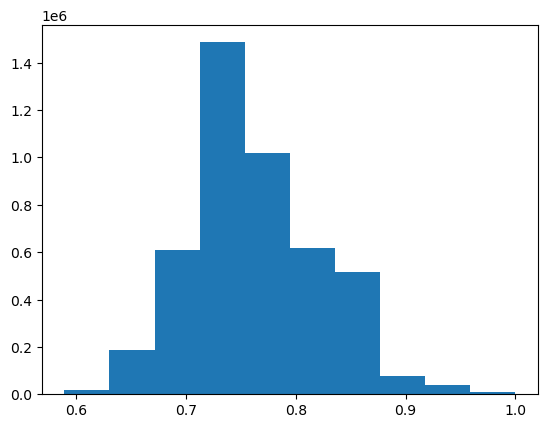

In [35]:
plt.hist(result['sum_'])
plt.show()

In [36]:
df1 = df.copy()
df1 = df1[chek]

In [37]:
from tqdm import tqdm

def len_(p1, p2):
    
    return (p1 == p2).mean()

i = 0
for prod1 in tqdm(a):
    vec = []
    vec.append(prod1)
#     flag = False
    for j, prod2 in enumerate(a):
        vec.append(result.iloc[ids[prod1]*2140 + ids[prod2], 56])
#     print(vec)
    mtr.loc[i] = vec
    i += 1
            

100%|██████████| 2140/2140 [02:54<00:00, 12.30it/s]


In [38]:
mtr

,product_id,40989,81951,32809,32810,32813,32814,32815,32818,32819,...,73700,73701,73702,73703,32747,98284,32748,32749,32755,56986
0,40989.0,1.000000,0.785714,0.732143,0.732143,0.696429,0.732143,0.732143,0.732143,0.732143,...,0.732143,0.732143,0.732143,0.732143,0.732143,0.803571,0.732143,0.714286,0.696429,0.750000
1,81951.0,0.785714,1.000000,0.767857,0.767857,0.714286,0.767857,0.767857,0.767857,0.767857,...,0.767857,0.767857,0.767857,0.767857,0.767857,0.750000,0.767857,0.750000,0.732143,0.785714
2,32809.0,0.732143,0.767857,1.000000,0.964286,0.839286,0.892857,0.892857,0.892857,0.892857,...,0.928571,0.928571,0.928571,0.928571,0.946429,0.696429,0.946429,0.928571,0.857143,0.732143
3,32810.0,0.732143,0.767857,0.964286,1.000000,0.839286,0.892857,0.892857,0.892857,0.892857,...,0.928571,0.928571,0.928571,0.928571,0.946429,0.696429,0.946429,0.928571,0.857143,0.732143
4,32813.0,0.696429,0.714286,0.839286,0.839286,1.000000,0.910714,0.910714,0.839286,0.839286,...,0.821429,0.821429,0.821429,0.821429,0.839286,0.660714,0.839286,0.857143,0.857143,0.678571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,98284.0,0.803571,0.750000,0.696429,0.696429,0.660714,0.696429,0.696429,0.696429,0.696429,...,0.696429,0.696429,0.696429,0.696429,0.696429,1.000000,0.696429,0.678571,0.660714,0.767857
2136,32748.0,0.732143,0.767857,0.946429,0.946429,0.839286,0.892857,0.892857,0.892857,0.892857,...,0.928571,0.928571,0.928571,0.928571,0.964286,0.696429,1.000000,0.946429,0.857143,0.732143
2137,32749.0,0.714286,0.750000,0.928571,0.928571,0.857143,0.875000,0.875000,0.875000,0.875000,...,0.910714,0.910714,0.910714,0.910714,0.946429,0.678571,0.946429,1.000000,0.857143,0.714286
2138,32755.0,0.696429,0.732143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,...,0.839286,0.839286,0.839286,0.839286,0.857143,0.660714,0.857143,0.857143,1.000000,0.696429


In [39]:
mtr.to_csv('product_sim.csv', index=False)

In [2]:
mtr = pd.read_csv('/kaggle/input/prod-sim/product_sim.csv')


In [3]:
from scipy.stats.stats import pearsonr

kl = mtr.iloc[0].copy().drop('product_id')
t = kl.iloc[np.argsort(kl)][2100:]
t.index

/tmp/ipykernel_32/4256917529.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


Index(['125352', '97746', '82739', '97747', '92371', '97742', '75033', '81397',
       '75037', '82736', '82740', '81014', '83951', '83952', '98959', '98955',
       '41679', '94174', '94173', '94171', '94170', '94169', '102746',
       '102748', '94177', '92370', '75032', '40784', '40785', '75036', '41141',
       '41142', '81015', '92366', '92367', '92368', '92369', '97755', '81030',
       '40989'],
      dtype='object')

In [4]:
def get_reco_dict(mtr, k):
    ans = dict()
    for i in tqdm(range(mtr.shape[0])):
        kl = mtr.iloc[i].copy()
        prod = kl['product_id']
        kl = kl.drop('product_id')
        ans[prod] = list(kl.iloc[np.argsort(kl)][2140-k:].index)
    return ans

In [5]:
rec = get_reco_dict(mtr, 40)

100%|██████████| 2140/2140 [00:02<00:00, 728.65it/s]


In [6]:
str_vec = []
for i in range(40):
    str_vec.append('rec' + str(i))

In [7]:
mtr_rec = pd.DataFrame(columns=['product_id'] + str_vec)
mtr_rec

,product_id,rec0,rec1,rec2,rec3,rec4,rec5,rec6,rec7,rec8,...,rec30,rec31,rec32,rec33,rec34,rec35,rec36,rec37,rec38,rec39


In [8]:
i=0
for p in rec:
    vec = []
    vec.append(p)
    vec.extend(reversed(rec[p]))
    mtr_rec.loc[i] = vec
    i+=1
mtr_rec

,product_id,rec0,rec1,rec2,rec3,rec4,rec5,rec6,rec7,rec8,...,rec30,rec31,rec32,rec33,rec34,rec35,rec36,rec37,rec38,rec39
0,40989.0,40989,81030,97755,92369,92368,92367,92366,81015,41142,...,82736,75037,81397,75033,97742,92371,97747,82739,97746,125352
1,81951.0,81951,76223,76221,76218,76222,91262,76219,93117,93118,...,23632,148787,148785,148793,23634,23633,23631,93144,148792,148791
2,32809.0,32809,32810,32748,32747,90480,37537,81665,81668,81395,...,74756,74757,74764,37538,37535,37540,37533,32404,32749,73703
3,32810.0,32810,32809,32748,32747,90480,37537,81665,81668,81395,...,74756,74757,74764,37538,37535,37540,37533,32404,32749,73703
4,32813.0,32813,32814,75974,32815,31874,31868,33011,37564,33012,...,34977,33014,31867,32749,37531,31656,31657,74758,32411,37566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,98284.0,98284,27256,77439,79892,79891,79890,115296,77336,89698,...,92726,92725,92730,76017,27291,77386,56837,77219,77218,56826
2136,32748.0,32748,32747,32749,32809,32810,90480,37537,81665,81668,...,31658,74756,74757,74764,37538,37535,37540,37533,32404,73703
2137,32749.0,32749,32748,32747,32810,32809,119433,37539,37537,37536,...,103583,90481,32403,81665,74759,37388,31873,31658,32404,32408
2138,32755.0,32755,105029,77567,77569,75970,88711,31868,99268,77566,...,90479,95994,82876,74759,37402,90478,37445,88694,103533,32990


In [9]:
mtr_rec.to_csv('products_rec.csv', index=False)

In [10]:
# df2.shape

In [11]:
df = pd.read_csv('/kaggle/input/hse-dab-naf-23/PRODUCT.csv', delimiter=';')
df = df[df.PRODUCT_LVL_RK5 == 3865].rename(columns = {'PRODUCT_RK' : 'product_id'})
len(set(df['product_id'].values))

11319

In [12]:
data = pd.read_csv('/kaggle/input/hse-dab-naf-23/train.csv')
data = data.merge(df, how='left')
data = data[data.PRODUCT_LVL_RK5 == 3865]
len(set(data['product_id'].fillna(0).values))

2140

In [13]:
data_grop = data.groupby(by='product_id', as_index=False).mean()

/tmp/ipykernel_32/3264429353.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grop = data.groupby(by='product_id', as_index=False).mean()


In [15]:
data_grop.shape

(2140, 18)

In [14]:
k = data['demand'].mean()
k

0.4186609237332906

In [16]:
data_grop['calk'] = abs(data_grop['demand'] - k)

In [23]:
dem = dict()
for i in range(data_grop.shape[0]):
    dem[int(data_grop.iloc[i, 0])] = data_grop.iloc[i, 2]

In [24]:
len(data_grop.columns)

20

In [25]:
data_grop

,product_id,location_id,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,id,PRODUCT_LVL_RK6,PRODUCT_LVL_RK5,PRODUCT_LVL_RK4,PRODUCT_LVL_RK3,PRODUCT_LVL_RK2,PRODUCT_LVL_RK1,SALES_INTRODUCTION_DT,SALES_DISCONTINUED_DT,calk,calk1
0,22939.0,726.056497,0.170391,0.107649,0.0,3467.230925,2459.589610,0.0,0.875354,186.299435,3876.0,3865.0,72946.0,3752.0,9848.0,1.0,NaN,NaN,0.248270,0
1,22940.0,773.643478,0.178586,0.098253,0.0,3542.583905,2405.485299,0.0,0.838428,603.378261,3876.0,3865.0,72946.0,3752.0,9848.0,1.0,NaN,NaN,0.240075,0
2,22941.0,808.221258,0.175033,0.163399,0.0,3446.754746,2343.354690,0.0,0.936819,1072.772234,3876.0,3865.0,72946.0,3752.0,9848.0,1.0,NaN,NaN,0.243628,0
3,22942.0,910.735149,0.138789,0.139651,0.0,3624.561429,2547.170021,0.0,0.957606,1512.331683,3876.0,3865.0,72946.0,3752.0,9848.0,1.0,NaN,NaN,0.279872,0
4,22947.0,904.440000,0.075196,0.320000,0.0,1891.280000,1099.640000,0.0,0.000000,209608.000000,3876.0,3865.0,72946.0,3752.0,9848.0,1.0,NaN,NaN,0.343464,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,149484.0,1316.000000,0.000000,1.000000,0.0,4350.000000,2175.000000,0.0,1.000000,204473.500000,3908.0,3865.0,72946.0,3752.0,9848.0,1.0,NaN,NaN,0.418661,0
2136,149509.0,1316.000000,1.000000,1.000000,0.0,3999.000000,1999.500000,0.0,1.000000,288671.000000,6161.0,3865.0,72946.0,3752.0,9848.0,1.0,NaN,NaN,0.581339,0
2137,149518.0,1316.000000,0.000000,1.000000,0.0,NaN,NaN,0.0,1.000000,288650.000000,3908.0,3865.0,72946.0,3752.0,9848.0,1.0,NaN,NaN,0.418661,0
2138,149520.0,1316.000000,2.000000,1.000000,0.0,4392.428571,2196.214286,0.0,1.000000,204476.000000,3908.0,3865.0,72946.0,3752.0,9848.0,1.0,NaN,NaN,1.581339,0


In [32]:
data_grop['calk1'] = 0
for i in range(data_grop.shape[0]):
    lo = int(data_grop.iloc[i, 0])
#     print(lo, rec[lo][38])
    r = rec[lo][38]
    data_grop.iloc[i, 19] = abs(dem[lo] - dem[int(r)])

In [35]:
data_grop[data_grop['calk'] > 3] = 3
data_grop[data_grop['calk1'] > 3] = 3

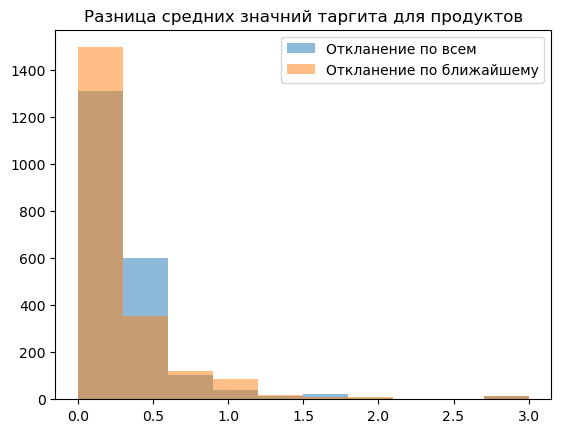

In [36]:
plt.hist(data_grop['calk'], alpha = 0.5, label='Откланение по всем')
plt.hist(data_grop['calk1'], alpha = 0.5, label='Откланение по ближайшему')
plt.title('Разница средних значний таргита для продуктов')
plt.legend()